# Computação Evolucionária

## Trabalho Prático 2

+ Amanda Kellen Soares de Pinho - 2017098188
+ Lucas Araujo Azevedo - 2017104188

## Questão 2
Implementação de AGG para solucionar o problema da mochila.

### Imports

In [1]:
import random
import string
import copy
import numpy as np
import random as rd
import matplotlib
import matplotlib.pyplot as plt

### Setando variáveis
* Tamanho da mochila
* Pesos dos itens 
* Valores dos itens
* $\rho$

In [2]:
size = 8
w = np.array([10, 18, 12, 14, 13, 11, 8, 6])
gain = np.array([5 , 8 , 7 , 6 , 9 , 5 , 4, 3])
capacity = 35

r = np.max(gain / w) 

### Gerar população
Gerar pop. de 0 ou 1 aleatórios de tamanho igual à quantidade de itens.

In [3]:
def generate_pop(n = 20):
    pop = []
    for i in range (n):
        ind = np.random.randint(0,2,size)
        pop.append(ind)
    return pop

### Função de penalização

o critério essencial para determinar a qualidade de uma solução é o benefício
total proporcionado pelos itens escolhidos$$(\sum_{j=1}^{N}V_{j}x_{j})$$.
No entanto, dada a codificação binária adotada para representar cada solução candidata, é necessário incluir na função de aptidão um mecanismo que penalize as soluções inválidas, isto é, as soluções cujo peso total $$(sum_{j=1}^{N}W_{j}x_{j})$$ ultrapassa a capacidade da Mochila. Se este mecanismo não for considerado, é trivial verificar que a melhor solução para o problema seria a que escolhe todos os itens para serem incluídos na Mochila. Assim, a avaliação da qualidade de uma dada solução candidata deverá ser feita com base na seguinte expressão $$f^{'}(\vec{x})=\sum_{j=1}^{N}V_{j}x_{j} - Pen(\vec{x})$$
onde $$Pen(\vec{x})=\begin{cases}
 & 0 \text{ , se } \vec{x}\text{ se e valida }  \\ 
 & \rho\times (\sum_{j=1}^{N}W_{j}x_{j}-cap))\text{ , caso contrario } 
\end{cases}$$ com $$\rho=max\frac{v_{j}}{w_{j}},\forall j=1,...,N$$

Abaixo é apresentada a função para cálculo dessa penalização.

In [4]:
def penal(proposed):
    level = r * np.maximum((np.sum(proposed*w) - capacity),0)
    return level 

### Funções de cálculo de fitness
Função para cálculo de fitness dos indivíduos. 

In [5]:
def fitness(proposed):
    s = []
    for prop in proposed:
        s.append(np.sum(gain*prop) - penal(prop))
    return s

def fitness_nq(proposed):
    v = (np.sum(gain*proposed) - penal(proposed))
    return v

### Função de mutação
Funções usadas para a mutação.

In [6]:
def mutation(offspring, mutation_rate):
    size_ind = len(offspring[0])
    population_copy = copy.copy(offspring)
    for i in range(len(population_copy)):
        if float(random.randint(0, 10))/10 <= mutation_rate:
            loc = random.randint(0,size_ind-1)
            population_copy[i,loc] = int(not (population_copy[i,loc]))
    return population_copy

### Função de crossover

In [7]:
def crossover(subset_parents, cross_over_rate):
    new_ = []
    if float(rd.randint(0, 10))/10 <= cross_over_rate:
        size_n = len(subset_parents[0])
        for i in range(0,int(len(subset_parents)/2),2):
            cut_v = random.randint(1, size_n-1)
            son1 = np.concatenate((subset_parents[i][0:cut_v], subset_parents[i+1][cut_v:]))
            son2 = np.concatenate((subset_parents[i+1][0:cut_v], subset_parents[i][cut_v:]))
            new_.append(son1)
            new_.append(son2)
    else:
        new_ = subset_parents
        
    return np.array(new_)


### Função de geração da próxima geração (substituição)

In [8]:
def replacement(offspring_new, pop):
    pop = np.concatenate((pop,offspring_new), axis=0)
    evaluate_v = []
    for indv in pop:
        evaluate_v.append(fitness_nq(indv))
    
    sorted_ = sorted(range(len(evaluate_v)), key=evaluate_v.__getitem__)
    pop_order = pop[sorted_]
    pop_order = pop_order[len(offspring_new):]
    
    return pop_order

### Função de seleção dos melhores indivíduos

In [9]:
def selection_fitness_r(population, indv):
    loss = fitness(population)
    loss_total = np.sum(loss) 
    fitness_norm = loss/loss_total # O fitness dos individuos é normalizado em relação ao fitness da população
    selected = []
    for i in range(indv):
        sel = random.random()
        acc = 0
        prev_acc = 0
        chosen = -1
        for j in range(len(fitness_norm)):
            acc += fitness_norm[j]
            if sel < acc and sel >= prev_acc:
                chosen = j
                break
            prev_acc = acc
        selected.append(population[chosen])
    return selected    

### Executando a evolução

In [10]:
pop = generate_pop(40)
cross_over_rate = 0.7
mutation_rate = 0.7
n_inter_max = 500
cut = 2

In [11]:
sol = []
n_iter = 0
fitness_avg = []
best_of_generation = []
biggest_fitness = -1
smallest_fitness = 1000

while n_iter < n_inter_max:
    subset_parents = selection_fitness_r(pop, cut)
    offspring = crossover(subset_parents, cross_over_rate)
    offspring_new = mutation(offspring, mutation_rate)
    pop = replacement(offspring_new, pop)
    fitness_scores = []
    last = fitness_nq(pop[-1])
    
    for p in pop:
        v = fitness_nq(p)
        fitness_scores.append(v)
        if last > biggest_fitness:
            biggest_fitness = last
            sol = copy.copy(pop[-1])

    best_of_generation.append(biggest_fitness)
            
    current_fitness_avg = sum(fitness_scores)/len(fitness_scores)
    fitness_avg.append(current_fitness_avg)
    
    if n_iter%50 == 0:
        print (f"Fitness da geração maior valor {n_iter}: {last}\n")    
    n_iter += 1

print (f"Fitness da geração maior valor {n_iter}: {last}\n")    
print(f"Melhor solução encontrada: {sol}")
print(f"Fitness da melhor solução encontrada: {biggest_fitness}")

Fitness da geração maior valor 0: 19.846153846153847

Fitness da geração maior valor 50: 19.846153846153847

Fitness da geração maior valor 100: 21.0

Fitness da geração maior valor 150: 21.0

Fitness da geração maior valor 200: 21.0

Fitness da geração maior valor 250: 21.0

Fitness da geração maior valor 300: 21.0

Fitness da geração maior valor 350: 21.0

Fitness da geração maior valor 400: 21.0

Fitness da geração maior valor 450: 21.0

Fitness da geração maior valor 500: 21.0

Melhor solução encontrada: [1 0 1 0 1 0 0 0]
Fitness da melhor solução encontrada: 21.0


### Resultados obtidos
Abaixo, podem ser vistos os resultados obtidos na execução do AGG com uma população inicial de 40 indivíduos.

In [15]:
print('**Solução**\n')
print('Número de iterações: {}'.format(n_iter))
print('Os objetos utilizados são: {}'.format(sol))
print('Peso na mochila: {}'.format(np.sum(sol*w)))
print('Ganho: {}\n\n'.format(np.sum(sol*gain)))
for e, i in enumerate(sol):
    if i:
        print('{} - Usa'.format(e+1))
    else:
        print('{} - Não'.format(e+1))

**Solução**

Número de iterações: 500
Os objetos utilizados são: [1 0 1 0 1 0 0 0]
Peso na mochila: 35
Ganho: 21


1 - Usa
2 - Não
3 - Usa
4 - Não
5 - Usa
6 - Não
7 - Não
8 - Não


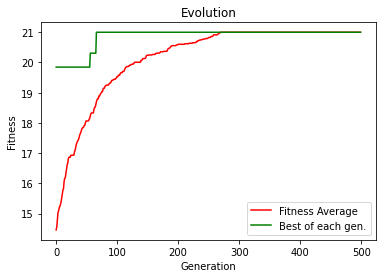

In [13]:
# Plotting both the curves simultaneously
X = range(n_iter)
plt.plot(X, fitness_avg, color='r', label='Fitness Average')
plt.plot(X, best_of_generation, color='g', label='Best of each gen.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

# Conclusão
Conforme podemos observara acima, podemos concluir que os resultados obtivos foram satisfatórios pois nosso algoritmo apresenta uma evolução otimizando seus resultados.